<a href="https://colab.research.google.com/github/JulianOmar/Colab_copy/blob/main/%5BTumorClassification%5D_mainProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DE CURSO: Tumor classification


In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/TumorClassification.zip

--2021-10-08 20:43:45--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/TumorClassification.zip’

/tmp/TumorClassific 100%[===================>]   7.11M  --.-KB/s    in 0.07s   

2021-10-08 20:43:46 (99.0 MB/s) - ‘/tmp/TumorClassification.zip’ saved [7460028/7460028]



## Descomprimir la base de datos y almacenarla en carpetas training y test
El siguiente código de Python usará la biblioteca del sistema operativo para usar las bibliotecas del sistema operativo, lo que le dará acceso al sistema de archivos y la biblioteca zipfile le permitirá descomprimir los datos.

En el siguiente código de Python utilizamos la libreria OS para poder dar acceso a los archivos del sistema operativo y luego con la librería ZipFile descomprimimos la base de datos.

In [ ]:
import os
import zipfile

local_zip = "/tmp/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/TumorClassification")
zip_ref.close()

#### Cargamos librerías

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Buscamos la dirección de nuestra base de datos
En este caso la base de datos esta distruibuida en training y test. Cada carpeta contiene otra subcarpeta en donde se tiene cada una de las clases de la base de datos. 

In [ ]:
train_dir = "/tmp/TumorClassification/Train"
test_dir = "/tmp/TumorClassification/Test"

## Data Generators
Configuremos generadores de datos que leerán imágenes en nuestras carpetas de origen, las convertirán en tensores `float32` y las alimentarán (con sus etiquetas) a nuestra red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Nuestros generadores producirán lotes de imágenes de tamaño 28x28 y sus etiquetas.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (124, 124),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (124, 124),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (124, 124),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


#### Definimos las clases de nuestra base de datos

In [ ]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

## Visualizamos la data

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

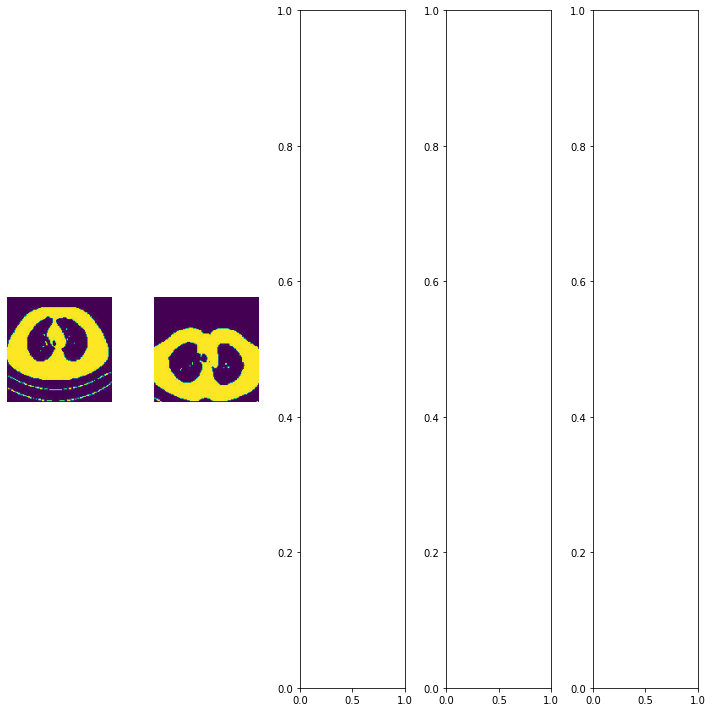

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

## Creamos nuestro modelo funcional base

In [ ]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (124, 124, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15376)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3936512   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 3,969,795
Trainable params: 3,969,795
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento
Entrenemos durante 10 épocas. Esto puede tardar unos minutos en ejecutarse.

In [ ]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 6s 6ms/step - loss: 1.2669 - accuracy: 0.6762 - val_loss: 0.8022 - val_accuracy: 0.7143
Epoch 2/20
525/525 [==============================] - 3s 6ms/step - loss: 0.5194 - accuracy: 0.7895 - val_loss: 2.1747 - val_accuracy: 0.6429
Epoch 3/20
525/525 [==============================] - 3s 5ms/step - loss: 0.2668 - accuracy: 0.8981 - val_loss: 4.1312 - val_accuracy: 0.6429
Epoch 4/20
525/525 [==============================] - 3s 5ms/step - loss: 0.1655 - accuracy: 0.9476 - val_loss: 5.3344 - val_accuracy: 0.7143
Epoch 5/20
525/525 [==============================] - 3s 5ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 5.9892 - val_accuracy: 0.6429
Epoch 6/20
525/525 [==============================] - 3s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.3854 - val_accuracy: 0.6429
Epoch 7/20
525/525 [==============================] - 3s 5ms/step - loss: 7.0545e-04 - accuracy: 1.0000 - val_loss: 6.3326 - val_accuracy: 0.7143
Ep

## Testeamos el modelo

In [ ]:
results = model_base.evaluate(test_generator)

72/72 [==============================] - 0s 4ms/step - loss: 7.7785 - accuracy: 0.5903


## Generamos una clase para visualizar y analizar los resultados

In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()


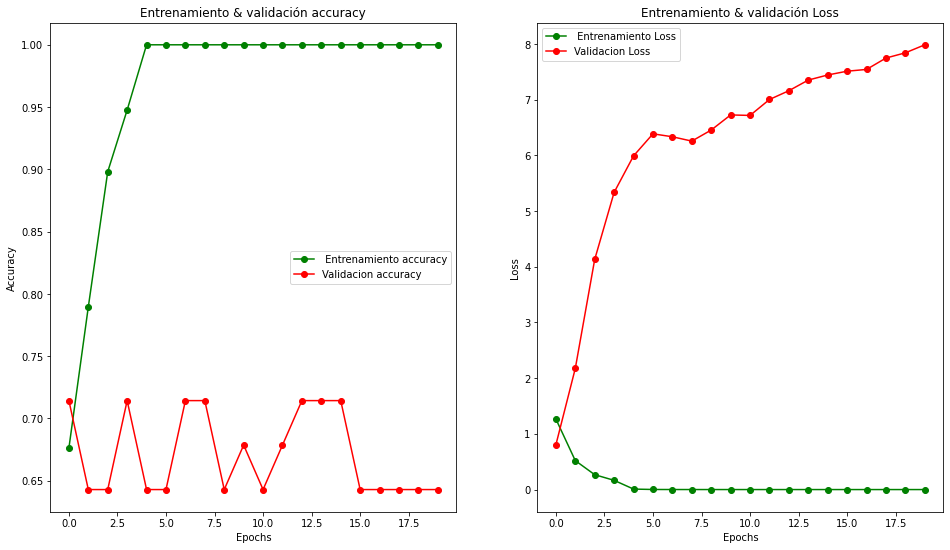

In [ ]:
visualizacion_resultados(history)

## Creamos nuestro modelo con regularizadores

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (124, 124, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3936512   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 3,969,795
Trainable params: 3,969,795
Non-trainable params: 0
____________________________________________

In [ ]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 4s 7ms/step - loss: 2.1874 - accuracy: 0.5210 - val_loss: 1.8436 - val_accuracy: 0.3929
Epoch 2/20
525/525 [==============================] - 4s 7ms/step - loss: 0.8245 - accuracy: 0.6162 - val_loss: 0.8325 - val_accuracy: 0.6429
Epoch 3/20
525/525 [==============================] - 4s 7ms/step - loss: 0.7521 - accuracy: 0.6790 - val_loss: 0.9188 - val_accuracy: 0.5357
Epoch 4/20
525/525 [==============================] - 4s 7ms/step - loss: 0.6179 - accuracy: 0.7495 - val_loss: 1.5109 - val_accuracy: 0.4643
Epoch 5/20
525/525 [==============================] - 3s 7ms/step - loss: 0.6778 - accuracy: 0.7162 - val_loss: 2.7087 - val_accuracy: 0.6429
Epoch 6/20
525/525 [==============================] - 3s 7ms/step - loss: 0.5760 - accuracy: 0.7790 - val_loss: 0.6683 - val_accuracy: 0.7143
Epoch 7/20
525/525 [==============================] - 4s 7ms/step - loss: 0.5895 - accuracy: 0.7648 - val_loss: 1.1099 - val_accuracy: 0.6429
Epoch 

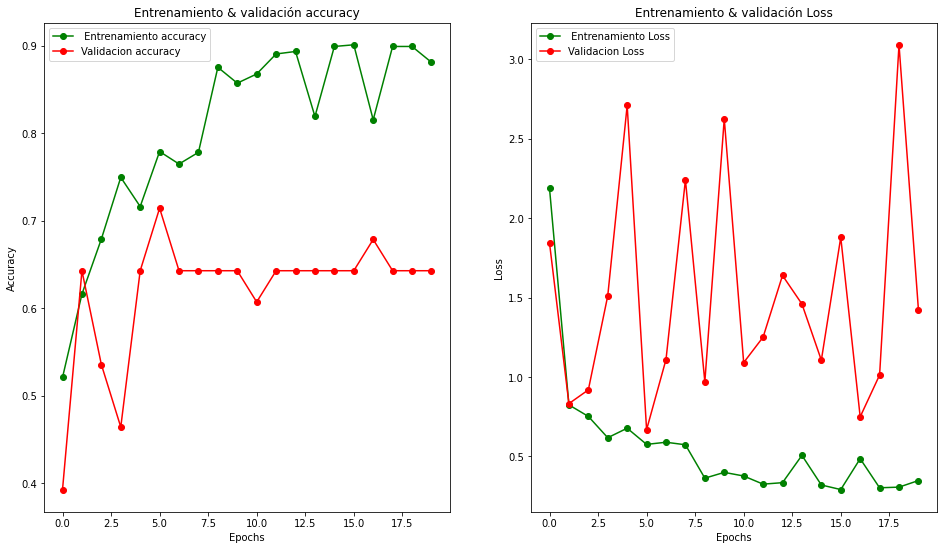

In [ ]:
visualizacion_resultados(history_optimizer)

## Creamos nuestro modelo con convoluciones

In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

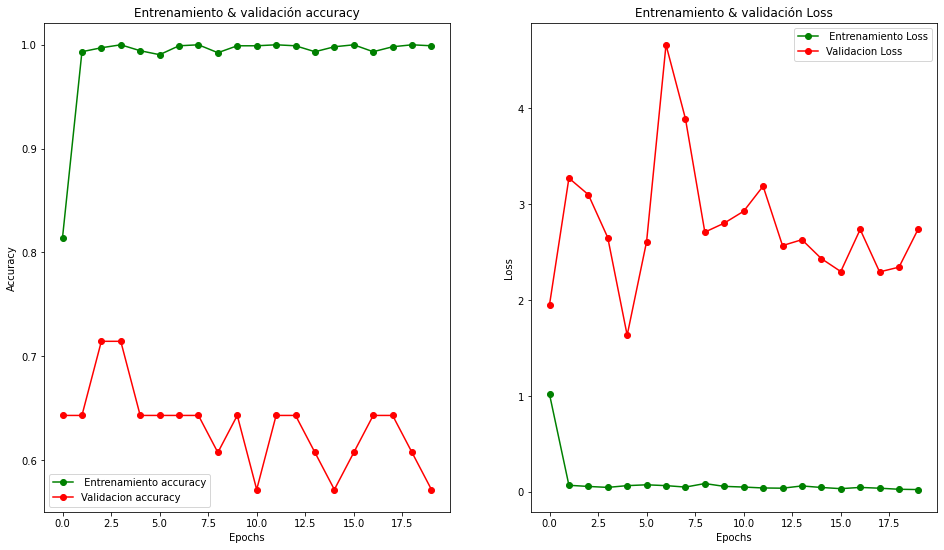

In [ ]:
visualizacion_resultados(history_convolutional)

## Calbacks personalizados
Link para visualizar más callbacks [aqui](https://colab.research.google.com/drive/1OYndV_bH8tDv5Qi8yxuoq4VzVUpsi82A?authuser=1).

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True


In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 35s 66ms/step - loss: 0.5363 - accuracy: 0.8476 - val_loss: 1.7644 - val_accuracy: 0.6786
Epoch 2/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0638 - accuracy: 0.9933 - val_loss: 2.6662 - val_accuracy: 0.6429
Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento


In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               71443456  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

## Early stopping

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 35s 66ms/step - loss: 0.6317 - accuracy: 0.8552 - val_loss: 2.0443 - val_accuracy: 0.6071
Epoch 2/20
525/525 [==============================] - 34s 66ms/step - loss: 0.0511 - accuracy: 0.9981 - val_loss: 2.2570 - val_accuracy: 0.6429
Epoch 3/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0433 - accuracy: 0.9990 - val_loss: 2.0751 - val_accuracy: 0.6786
Epoch 4/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0544 - accuracy: 0.9943 - val_loss: 2.6749 - val_accuracy: 0.6071
Epoch 5/20
525/525 [==============================] - 35s 66ms/step - loss: 0.1096 - accuracy: 0.9838 - val_loss: 2.1196 - val_accuracy: 0.6071
Epoch 6/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0823 - accuracy: 0.9990 - val_loss: 2.2644 - val_accuracy: 0.6071


## Creamos nuestra modelo funcional con Auto Tunner Keras

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

     |████████████████████████████████| 97 kB 3.0 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation= "relu", input_shape = (124, 124, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 256, max_value = 512, step = 128)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model


In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 2,
    factor = 2,
    directory = "models/",
    project_name = "platzi-tunner"
)

In [ ]:
tuner.search(train_generator, epochs =1, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =1)[0]

Trial 5 Complete [00h 01m 46s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7142857313156128
Total elapsed time: 00h 07m 13s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get("units"))

512


In [ ]:
print(best_hps.get("learning_rate"))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 63s 117ms/step - loss: 1.0741 - accuracy: 0.8533 - val_loss: 1.7593 - val_accuracy: 0.6429
Epoch 2/20
525/525 [==============================] - 62s 117ms/step - loss: 0.0936 - accuracy: 0.9943 - val_loss: 1.8533 - val_accuracy: 0.6786
Epoch 3/20
525/525 [==============================] - 62s 118ms/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 1.9322 - val_accuracy: 0.6786
Epoch 4/20
525/525 [==============================] - 62s 118ms/step - loss: 0.0605 - accuracy: 0.9981 - val_loss: 2.0234 - val_accuracy: 0.4286
Epoch 5/20
525/525 [==============================] - 62s 118ms/step - loss: 0.1288 - accuracy: 0.9829 - val_loss: 2.2680 - val_accuracy: 0.6786
Epoch 6/20
525/525 [==============================] - 62s 118ms/step - loss: 0.1111 - accuracy: 0.9971 - val_loss: 1.9825 - val_accuracy: 0.6786
Epoch 7/20
525/525 [==============================] - 62s 118ms/step - loss: 0.0789 - accuracy: 1.0000 - val_loss: 2.3001 - val_ac

## Guardar únicamente arquitectura del modelo

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 124, 124, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 124, 124, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, {'cl

## Crear un nuevo modelo desde la arquitectura

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 75)        0         
_________________________________________________________________
flatten (Flatten)            (None, 279075)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               142886912 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Lecturas adicionales para almacenamiento de arquitectura
* https://www.tensorflow.org/guide/keras/save_and_serialize#architecture-only_saving
* https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

## Guardar y cargar únicamente los pesos
#### Entrenar el modelo con los checkpoints

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Creamos unos checkpoint de nuestros modelos con TensorFlow, verbose: mostrar mas información
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)

In [ ]:
# Entrenamos el modelo, y almacenamos en cada steps los pesos del moedelo.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


Epoch 1/20
525/525 [==============================] - 35s 65ms/step - loss: 0.7558 - accuracy: 0.8400 - val_loss: 2.3376 - val_accuracy: 0.6429

Epoch 00001: saving model to model_checpoints/checkpoint
Epoch 2/20
525/525 [==============================] - 34s 65ms/step - loss: 0.0789 - accuracy: 0.9905 - val_loss: 2.2921 - val_accuracy: 0.6429

Epoch 00002: saving model to model_checpoints/checkpoint
Epoch 3/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0466 - accuracy: 1.0000 - val_loss: 2.2080 - val_accuracy: 0.6429

Epoch 00003: saving model to model_checpoints/checkpoint
Epoch 4/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0717 - accuracy: 0.9971 - val_loss: 1.6519 - val_accuracy: 0.7143

Epoch 00004: saving model to model_checpoints/checkpoint
Epoch 5/20
525/525 [==============================] - 35s 66ms/step - loss: 0.0805 - accuracy: 0.9933 - val_loss: 3.0483 - val_accuracy: 0.5714

Epoch 00005: saving model to model_checpoints/c

#### Guardamos los pesos de forma manual

In [ ]:
model_weight.save_weights("model_manul/my_model")

#### Creamos la arquitectura y cargamos los pesos

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)


In [ ]:
model_weights2.evaluate(test_generator)

72/72 [==============================] - 1s 13ms/step - loss: 4.8097 - accuracy: 0.5486


[4.809661388397217, 0.5486111044883728]

In [ ]:
model_weight.evaluate(test_generator)

72/72 [==============================] - 1s 12ms/step - loss: 4.8097 - accuracy: 0.5486


[4.809661865234375, 0.5486111044883728]

## Criterios para almacenar modelos
#### Almacenar infraestructura y peso

In [ ]:
checkpoint_path = "model_checpoints_complete"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1

)

In [ ]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/20
525/525 [==============================] - 36s 67ms/step - loss: 0.8681 - accuracy: 0.8314 - val_loss: 2.9546 - val_accuracy: 0.7143

Epoch 00001: val_accuracy improved from -inf to 0.71429, saving model to model_checpoints_complete
INFO:tensorflow:Assets written to: model_checpoints_complete/assets
Epoch 2/20
525/525 [==============================] - 35s 67ms/step - loss: 0.0712 - accuracy: 0.9905 - val_loss: 2.3886 - val_accuracy: 0.6429

Epoch 00002: val_accuracy did not improve from 0.71429
Epoch 3/20
525/525 [==============================] - 36s 68ms/step - loss: 0.0547 - accuracy: 0.9981 - val_loss: 2.7069 - val_accuracy: 0.6786

Epoch 00003: val_accuracy did not improve from 0.71429
Epoch 4/20
525/525 [==============================] - 36s 68ms/step - loss: 0.0639 - accuracy: 0.9952 - val_loss: 2.7842 - val_accuracy: 0.6429

Epoch 00004: val_accuracy did not improve from 0.71429
Epoch 5/20
525/525 [==============================] - 36s 68ms/step - loss: 0.0474 - acc

#### Almacenar infraestructura y peso manual

In [ ]:
model_complete.save("saved_model_complete/mymodel")

INFO:tensorflow:Assets written to: saved_model_complete/mymodel/assets


#### Cargamos nuestro modelo completo

In [ ]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [ ]:
model_complete3.evaluate(test_generator)

72/72 [==============================] - 1s 14ms/step - loss: 3.0308 - accuracy: 0.5833


[3.0307741165161133, 0.5833333134651184]

In [ ]:
model_complete.evaluate(test_generator)

72/72 [==============================] - 1s 13ms/step - loss: 3.0308 - accuracy: 0.5833


[3.0307745933532715, 0.5833333134651184]

#### Usar el formato .h5 para guardar modelos
Hierarchical Data Format (HDF5 format)

In [ ]:
!pip install pyyaml h5py

In [ ]:
model_complete3.save("my_model.h5")

In [ ]:
model_complete4 = tf.keras.models.load_model("my_model.h5")

## Creamos nuestra modelo pre-entrenado con modelos de Keras
#### Preprocesamiento de nuestra base de datos.
Debemos revisar cual es el input de nuestro modelos (Tamaño del tensor de entrada)

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 2,
    class_mode = "categorical",
    color_mode = "rgb"
)

Found 1050 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

#### Congelamos el modelo 
Congelamos hasta la capa mixed 7 para agregar nuestra capas de salida

In [ ]:
last_layers= pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation= "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
525/525 [==============================] - 18s 26ms/step - loss: 0.9198 - accuracy: 0.7552 - val_loss: 0.5965 - val_accuracy: 0.8571
Epoch 2/5
525/525 [==============================] - 12s 23ms/step - loss: 0.2001 - accuracy: 0.9314 - val_loss: 3.1028 - val_accuracy: 0.6071
Epoch 3/5
525/525 [==============================] - 12s 23ms/step - loss: 0.1061 - accuracy: 0.9648 - val_loss: 3.7691 - val_accuracy: 0.6429
Epoch 4/5
525/525 [==============================] - 12s 23ms/step - loss: 0.0855 - accuracy: 0.9686 - val_loss: 4.2621 - val_accuracy: 0.6071
Epoch 5/5
525/525 [==============================] - 12s 23ms/step - loss: 0.1040 - accuracy: 0.9619 - val_loss: 1.9348 - val_accuracy: 0.6071


In [ ]:
results = model_keras.evaluate(test_generator_resize)

72/72 [==============================] - 2s 23ms/step - loss: 1.8342 - accuracy: 0.5625


## Creamos nuestra modelo pre-entrenado con modelos desde TensorFlow Hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
                                 tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
                                 hub.KerasLayer(module_url, trainable=False),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation ="relu"),
                                 tf.keras.layers.Dropout(rate=0.2),
                                 tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_hub.build((None, 150, 150, 3))
model_hub.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               128256    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 387       
Total params: 1,471,692
Trainable params: 128,643
Non-trainable params: 1,343,049
_________________________________________________________________


In [ ]:
model_hub.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_hub = model_hub.fit(
    train_generator_resize,
    epochs= 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
525/525 [==============================] - 8s 10ms/step - loss: 1.4196 - accuracy: 0.5267 - val_loss: 1.0444 - val_accuracy: 0.5357
Epoch 2/5
525/525 [==============================] - 5s 10ms/step - loss: 0.8339 - accuracy: 0.5905 - val_loss: 1.0612 - val_accuracy: 0.6429
Epoch 3/5
525/525 [==============================] - 5s 10ms/step - loss: 0.7400 - accuracy: 0.6381 - val_loss: 0.8194 - val_accuracy: 0.8214
Epoch 4/5
525/525 [==============================] - 5s 9ms/step - loss: 0.7024 - accuracy: 0.6657 - val_loss: 0.6204 - val_accuracy: 0.7857
Epoch 5/5
525/525 [==============================] - 5s 9ms/step - loss: 0.6383 - accuracy: 0.6848 - val_loss: 0.8846 - val_accuracy: 0.6786


In [ ]:
results = model_hub.evaluate(test_generator_resize)

72/72 [==============================] - 1s 9ms/step - loss: 0.6587 - accuracy: 0.7361


## Conectar con TensorBoard

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = get_model()
model_tensorboard.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])



In [ ]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [ ]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_tensorboard],
    validation_data = validation_generator
)

#### Ejecutamos nuestro tensorboard con los comandos magic
Se puede visualizar desde Google Colab o desde el terminal

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs 


## Comportamos los resultados con el mundo entero
Mayor información ingresa sobre Tensorflow.dev [aquí](https://tensorboard.dev/)

In [ ]:
!tensorboard dev upload --logdir ./logs --name "Proyecto de Clasificación de Tumor " --description "Estos son los resultados del entrenamiento" --one_shot